# Examples 

As our main examples we will consider Hilbert modular groups of the following three number Fields:
- $ K_1 = \mathbb{Q}(\sqrt{5})$  (one cusp, discriminant 5, generally the simplest example)
- $ K_2 = \mathbb{Q}(\sqrt{10})$ (two cusps, discriminant 40)
- $ K_3 = \mathbb{Q}(\alpha)$, where $\alpha$ has minimal polynomial $\alpha^3-\alpha^2-2x+1$ (one cusp, discriminant 49)

In [66]:
def plot_polygon(p,basis,action='show',filename='',inside_polygon=None,**options):
    """
    INPUT: 
    - `p` -- polygon
    - `basis` -- basis for a lattice (usually given by an ideal)
    - `action` -- string (default 'show') can be 'show' or 'save'
    - `filename` -- filename to save figure to if action = 'save'
    - 'inside_bounds' -- a list of bounds within which to restrict the lattice points (to e.g. only plot inside the polygon)
    """
    xmin = options.get('xmin') or floor(min(v[0] for v in p.vertices()))
    xmax = options.get('xmax') or ceil(max(v[0] for v in p.vertices()))
    ymin = options.get('ymin') or floor(min(v[1] for v in p.vertices()))
    ymax = options.get('ymax') or ceil(max(v[1] for v in p.vertices()))
    n = len(basis)
    if n == 3:
        zmin = options.get('zmin') or floor(min(v[2] for v in p.vertices()))
        zmax = options.get('zmax') or ceil(max(v[2] for v in p.vertices()))
    elif n > 3:
        raise NotImplementedError("This plotting function is only implemented for degrees 2 and 3.")
    plot_options = {'point':False,'line':'black','fill':(0.9,0.9,0.9),'wireframe':'black','polygon':[0.9,0.9,0.9]}
    show_options = {'ticks': options.get('ticks',[xmax,ymax])}
    # Remove unwanted options for the polo
    for k in deepcopy(list(options)): 
        if k not in plot_options:            
            options.pop(k)
    if hasattr(basis[0],'complex_embeddings'):
        labels = [r'$\varphi_1$',r'$\varphi_2$']
        if n == 3:
            labels += r'$\varphi_3$'
    else:
        labels = ['$X_1$','$X_2$']
        if n == 3:
            labels += r'$X_3$'
        
    plot_options.update(options)
    
    G = Graphics();
    G+=p.plot(**plot_options)
    if n == 2:
        a,b=basis
        for i in range(floor(xmin),ceil(xmax)+1):
            for j in range(floor(ymin),ceil(ymax)+1):
                x = a*i + b*j
                if hasattr(x,'complex_embeddings'):
                    coordinates = [tuple(x.complex_embeddings())]
                else:
                    coordinates = [(i,j)]
                if inside_polygon and coordinates[0] not in p:
                    continue
                G+=point2d(coordinates,zorder=1,color='black',size=20)
        G.set_axes_range(xmin-1,xmax+1,ymin-1,ymax+1)
        G.axes_labels(labels)

    else:
        a,b,c=basis
        for i in range(floor(xmin),ceil(xmax)+1):
            for j in range(floor(ymin),ceil(ymax)+1):
                for k in range(floor(zmin),ceil(zmax)+1):
                    x = a*i + b*j + c*k
                    if hasattr(x,'complex_embeddings'):
                        coordinates = [tuple(x.complex_embeddings())]
                    else:
                        coordinates = [(i,j,k)]
                    if inside_polygon and coordinates[0] not in p:
                        continue                            
                    G+=point3d(coordinates,zorder=1,color='black',size=20)

    if action == 'show':
        return G.show(**show_options)
    elif action == 'save' and filename:
        G.save(filename,**show_options)

## Example 1 $K_1=\mathbb{Q}(\sqrt{5})$

This has class number 1, discriminant 5 and a fundamental unit 
$\epsilon=\frac{1}{2}(1+\sqrt{5})$.

Note that SageMath chooses the fundamental unit $\epsilon=-(1+\sqrt{5})/2$ but this choice does not effect any of the results.

In [67]:
from hilbert_modgroup.all import HilbertModularGroup, HilbertPullback, UpperHalfPlaneProductElement
H1 = HilbertModularGroup(5)
K1 = H1.base_ring().number_field()
P1 = HilbertPullback(H1)

$$
B_{\Lambda} = (\begin{array}{cc}
\log(\frac{1}{2}(1+\sqrt{5})) & \log(\frac{1}{2}(\sqrt{5}-1))\end{array})^t
$$

In [68]:
P1.basis_matrix_logarithmic_unit_lattice()

[ 0.481211825059603]
[-0.481211825059603]

In [69]:
P1.basis_matrix_logarithmic_unit_lattice().norm(Infinity)

0.48121182505960347

$$
B_{\mathcal{O}_K}
=\left(\begin{array}{cc}
1 & -\frac{1}{2}\left(1+\sqrt{5}\right)\\
1 & -\frac{1}{2}\left(1-\sqrt{5}\right)
\end{array}\right),\ 
B_{\mathcal{O}_K}^{-1}=\frac{1}{\sqrt{5}}\left(\begin{array}{cc}
-\frac{1}{2}(1-\sqrt{5}) & \frac{1}{2}(1+\sqrt{5})\\
-1 & 1
\end{array}\right)
$$

In [70]:
P1.D()

1.272019649514069

In [71]:
P1.basis_matrix_ideal().inverse()

[ 0.276393202250022  0.723606797749978]
[-0.447213595499959  0.447213595499959]

In [72]:
P1.basis_matrix_ideal().norm(Infinity)

2.61803398874989

In [73]:
P1.basis_matrix_ideal().inverse().norm(Infinity)

1.0

In [74]:
z=UpperHalfPlaneProductElement([CC(0,1),CC(0,1)])

In [75]:
p=P1._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)

Make a plot of the box given by the bounds of the embeddings. 

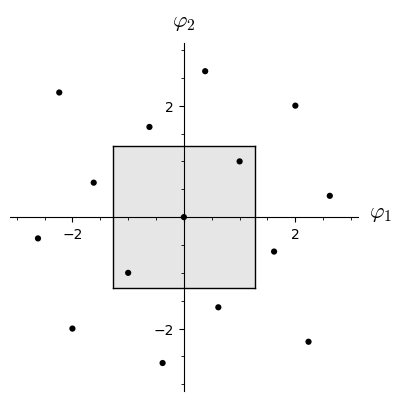

In [76]:
plot_polygon(p,K1.ideal(1).integral_basis(),action='show')

In [77]:
plot_polygon(p,K1.ideal(1).integral_basis(),action='save',filename='K1.z1.domain1.pgf')

In [78]:
p1=P1._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)

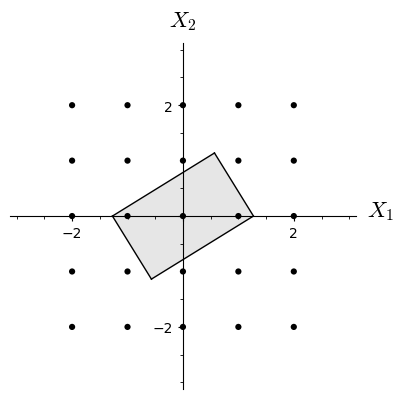

In [79]:
plot_polygon(p1,[1,1],action='show')

In [80]:
plot_polygon(p1,[1,1],action='save',filename='K1.z1.domain2.pgf')

Now let's see what candidates we have for sigma:

In [81]:
l=P1._candidate_integers_sigma(z,domain='polytope'); l

[0, -1, 1]

In [82]:
for c in P1._candidate_closest_cusps(z):
    print(f"({str(c[0]):<3} : {str(c[1]):>3})",P1.distance_to_cusp(c,z))

(1   :   0) 1.00000000000000
(0   :   1) 1.00000000000000
(-1  :  -1) 2.00000000000000
(1   :  -1) 2.00000000000000


Let's go through the same steps but for $\mathbf{z}=\frac{i}{2} \mathbf{1}$:

In [83]:
P1.basis_matrix_ideal()

[ 1.00000000000000 -1.61803398874989]
[ 1.00000000000000 0.618033988749895]

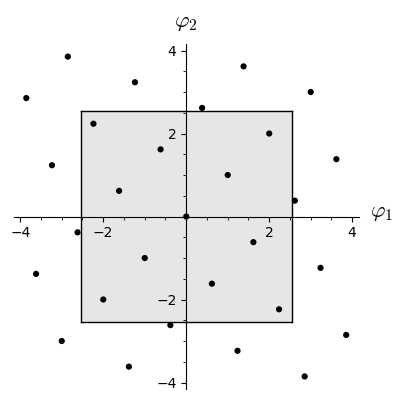

In [84]:
z=UpperHalfPlaneProductElement([CC(0,0.5),CC(0,0.5)])
p=P1._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K1.ideal(1).integral_basis(),action='show',ticks=[2,2])

In [85]:
plot_polygon(p,K1.ideal(1).integral_basis(),action='save',filename='K1.z2.domain1.pgf',ticks=[2,2])

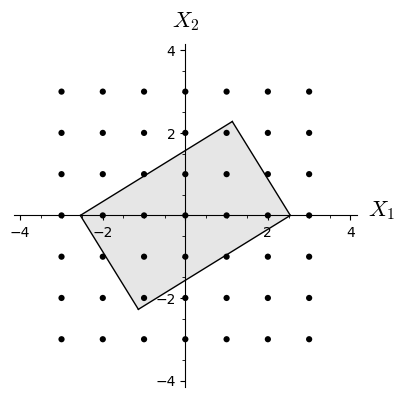

In [86]:
p=P1._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1],action='show',ticks=[2,2])

In [87]:
plot_polygon(p,[1,1],action='save',filename='K1.z2.domain2.pgf',ticks=[2,2])

## Example 2  $K_2=\mathbf{Q}(\sqrt{10})$

This has class number 2, discriminant $40$ and fundamental unit $\epsilon=3+\sqrt{10}$.

Note that SageMath orders the embeddings as $-\sqrt{10},+\sqrt{10}$ chooses the fundamental unit $3-\sqrt{10}$.

In [88]:
from hilbert_modgroup.all import HilbertModularGroup, HilbertPullback, UpperHalfPlaneProductElement
H2 = HilbertModularGroup(10)
K2 = H2.base_ring().number_field()
P2 = HilbertPullback(H2)

The two cusps of $\mathrm{SL}(\mathcal{O}_{K_2})$ can be represented by 
$\lambda_1=\infty=(1:0)$ and $\lambda_2=(3:2+\sqrt{10})$ corresponding to the representative ideals
$\mathfrak{a}_1=\mathcal{O}_{K_2}$ and $\mathfrak{a}_2=(3,2+\sqrt{10})$ 

In [89]:
H2.cusps()

[Cusp Infinity of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?,
 Cusp [3: a + 2] of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?]

In [90]:
c=H2.cusps()[1]
(c.numerator()/c.denominator()).complex_embeddings()

[-2.58113883008419, 0.581138830084190]

The ring of integers has basis $\alpha_1=1$ and $\alpha_2=\sqrt{10}$ so we have 

$$
B_{\mathcal{O}_{K_2}} = 
\left(\begin{array}{cc}
1 & \sqrt{10}\\
1 & -\sqrt{10}
\end{array}\right)
\quad
B_{\mathcal{O}_{K_2}}^{-1}=\frac{1}{-2\sqrt{10}}\left(\begin{array}{cc}
-\sqrt{10} & -\sqrt{10}\\
-1 & 1
\end{array}\right)
$$
and
$$B_{\Lambda} = \left(\log (3+\sqrt{10})  \log (\sqrt{10}-3)\right).$$

Hence $$\left\Vert B_{\Lambda}\right\Vert _{\infty}	\approx1.81, \quad D_{0}\approx4.30,$$
$$\left\Vert B_{\mathcal{O}_K}\right\Vert _{\infty}\approx4.16 \quad  \left\Vert B_{\mathcal{O}_K}^{-1}\right\Vert _{\infty}=1.$$

In [92]:
P2.D()

4.299631726148779

In [93]:
P2.basis_matrix_ideal().inverse().norm(Infinity)

1.0

In [94]:
P2.basis_matrix_logarithmic_unit_lattice().norm(Infinity)

1.8184464592320668

In [95]:
z=UpperHalfPlaneProductElement([CC(0,1.0),CC(0,1.0)])
P2.find_closest_cusp(z,return_multiple=False)

Cusp Infinity of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?

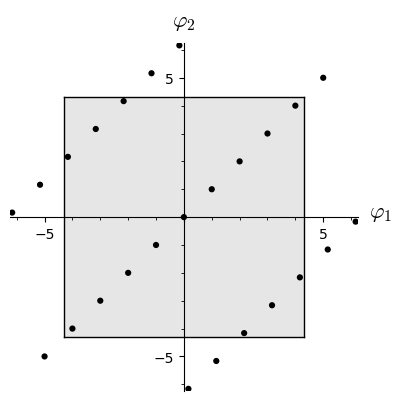

In [96]:
p=P2._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K2.ideal(1).integral_basis(),action='show',ticks=[5,5])

In [97]:
plot_polygon(p,K2.ideal(1).integral_basis(),action='save',ticks=[5,5],filename='K2.z1.domain1.pgf')

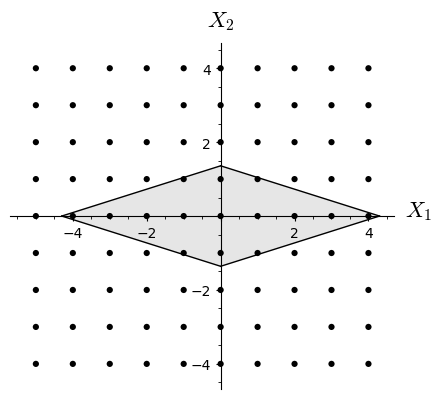

In [98]:
p=P2._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1],action='show',ticks=[2,2],xmin=-4.5,xmax=3.5,ymin=-3.5,ymax=3.5)

In [99]:
plot_polygon(p,[1,1],action='save',ticks=[2,2],filename='K2.z1.domain2.pgf',xmin=-3.5,xmax=3.5,ymin=-3.5,ymax=3.5)

Now let's find the closest cusps to $\mathbf{z}$

In [100]:
sigmas = P2._candidate_integers_sigma(z,domain='polytope')
print(sigmas)
print(len(sigmas))

[0, -1, 1, -2, 2, -3, 3, a, -a, a - 1, a + 1, -a - 1, -a + 1, -4, 4]
15


In [101]:
candidate_cusps = P2._candidate_closest_cusps(z,as_cusps=True)
print("Number of candidate cusps=",len(candidate_cusps))

Number of candidate cusps= 80


In [102]:
P2.find_closest_cusp(z,return_multiple=True)

[Cusp Infinity of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?,
 Cusp [0: 1] of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?]

Let's consider moving the point further towards 0.

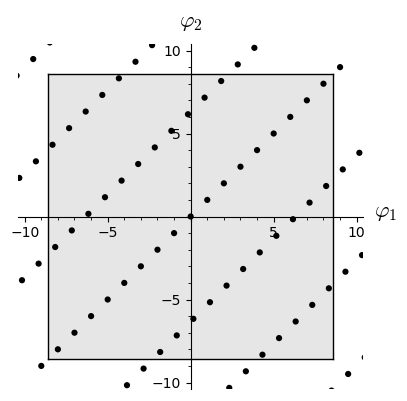

In [103]:
z=UpperHalfPlaneProductElement([CC(0,0.5),CC(0.0,0.5)])
p=P2._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K2.ideal(1).integral_basis(),action='show',ticks=[5,5])

In [104]:
plot_polygon(p,K2.ideal(1).integral_basis(),action='save',ticks=[5,5],filename='K2.z2.domain1.pgf')

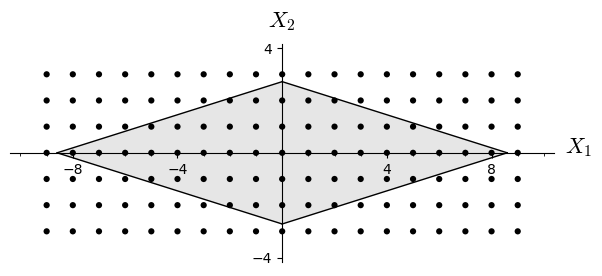

In [105]:
p=P2._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1],action='show',ticks=[4,4])

In [106]:
plot_polygon(p,[1,1],action='save',ticks=[4,4],filename='K2.z2.domain2.pgf')

In [107]:
sigmas = P2._candidate_integers_sigma(z,domain='polytope')
print(sigmas)
print(len(sigmas))

[0, -1, 1, -2, 2, -3, 3, a, -a, a - 1, a + 1, -a - 1, -a + 1, a - 2, a + 2, -a - 2, -a + 2, -4, 4, a - 3, a + 3, -a - 3, -a + 3, -5, 5, a - 4, -a - 4, a + 4, -a + 4, a - 5, -a - 5, a + 5, -a + 5, -6, 6, 2*a, -2*a, 2*a - 1, 2*a + 1, -2*a - 1, -2*a + 1, 2*a - 2, 2*a + 2, -2*a - 2, -2*a + 2, -7, 7, -8, 8]
49


In [108]:
candidate_cusps = P2._candidate_closest_cusps(z,as_cusps=True)
print("Number of candidate cusps=",len(candidate_cusps))

Number of candidate cusps= 272


In [109]:
P2.find_closest_cusp(z,return_multiple=True)

[Cusp [0: 1] of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?]

In [110]:
P2.distance_to_cusp((0,1),z)

0.500000000000000

So far we have only involved cusps equivalent to infinity. 
To demonstrate the the algorithm works for other cusps, consider the following point 


In [111]:
z=UpperHalfPlaneProductElement([CC(2.58,0.5),CC(0.5,0.5)])

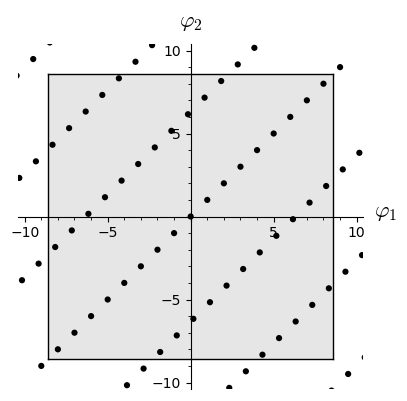

In [112]:
p=P2._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K2.ideal(1).integral_basis(),action='show',ticks=[5,5])

In [113]:
plot_polygon(p,K2.ideal(1).integral_basis(),action='save',ticks=[5,5],filename='K2.z3.domain1.pgf')

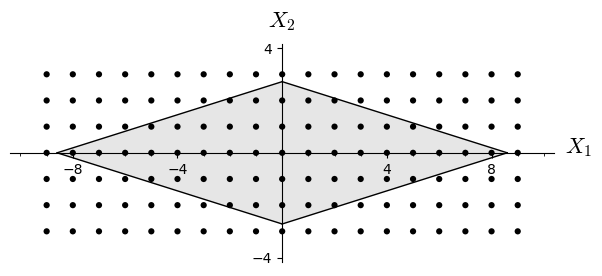

In [114]:
p=P2._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1],action='show',ticks=[4,4])

In [115]:
plot_polygon(p,[1,1],action='save',ticks=[4,4],filename='K2.z3.domain2.pgf')

In [116]:
sigmas = P2._candidate_integers_sigma(z,domain='polytope')
print(sigmas)
print(len(sigmas))

[0, -1, 1, -2, 2, -3, 3, a, -a, a - 1, a + 1, -a - 1, -a + 1, a - 2, a + 2, -a - 2, -a + 2, -4, 4, a - 3, a + 3, -a - 3, -a + 3, -5, 5, a - 4, -a - 4, a + 4, -a + 4, a - 5, -a - 5, a + 5, -a + 5, -6, 6, 2*a, -2*a, 2*a - 1, 2*a + 1, -2*a - 1, -2*a + 1, 2*a - 2, 2*a + 2, -2*a - 2, -2*a + 2, -7, 7, -8, 8]
49


In [117]:
candidate_cusps = P2._candidate_closest_cusps(z,as_cusps=True)
print("Number of candidate cusps=",len(candidate_cusps))

Number of candidate cusps= 197


In [118]:
P2.find_closest_cusp(z,return_multiple=True)

[Cusp [3*a - 10: a - 4] of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?]

This cusp is equivalent to the second cusp: 

In [119]:
c = P2.find_closest_cusp(z,return_multiple=True)[0]

In [120]:
(c.numerator()/c.denominator()).complex_embeddings()

[2.72075922005613, 0.612574113277207]

In [121]:
(-3*sqrt(10.0)-10)/(-sqrt(10.)-4)

2.72075922005613

In [122]:
c.is_Gamma0_equivalent(H2.cusps()[0],K2.ideal(1)) # Not equivalent to infinity

False

In [123]:
c.is_Gamma0_equivalent(H2.cusps()[1],K2.ideal(1),True) #Is equivalent to the other cusp.

(True, [a + 9, a - 12, 4*a + 9, -4*a - 3])

In [124]:
l=_[1]

In [125]:
c.apply(l)

Cusp [a - 2: 2] of Number Field in a with defining polynomial x^2 - 10 with a = 3.162277660168380?

In [126]:
P2.distance_to_cusp(c,z)

1.59731464318420

## Example 3

In [127]:
x = ZZ['x'].gen()
K3.<a> = NumberField(x^3-x^2-2*x+1)
H3=HilbertModularGroup(K3)
P3=HilbertPullback(H3)
print("Class number=",H3.ncusps())
print("Discriminant=",K3.discriminant())

Class number= 1
Discriminant= 49


In [128]:
a.complex_embeddings()

[-1.24697960371747, 0.445041867912629, 1.80193773580484]

In [129]:
P3.fundamental_units()

[-a^2 + 2, a^2 - 1]

In [130]:
K3.ideal(1).basis()

[1, a, a^2 - 2]

In [131]:
P3.basis_matrix_logarithmic_unit_lattice()

[-0.809586916044712 -0.588862605761680]
[ 0.588862605761680 -0.220724310283033]
[ 0.220724310283033  0.809586916044713]

In [132]:
P3.basis_matrix_logarithmic_unit_lattice().norm(Infinity)

1.3984495218063921

In [133]:
P3.basis_matrix_ideal().inverse()

[ 0.543133962257833  0.107574342326077  0.349291695416090]
[-0.435559619931757  0.241717353090013  0.193842266841744]
[ 0.193842266841744 -0.435559619931757  0.241717353090013]

In [134]:
P3.D()

2.0121921726123237

In [391]:
P3.basis_matrix_ideal().norm(Infinity)

4.04891733952231

In [392]:
P3.basis_matrix_ideal().inverse().norm(Infinity)

1.0

In [306]:
z=UpperHalfPlaneProductElement([CC(0,1.0),CC(0,1.0),CC(0,1.0)])
P3.find_closest_cusp(z,return_multiple=False)

Cusp Infinity of Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1

In [341]:
p=P3._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)

In [352]:
p=P3._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K3.ideal(1).integral_basis(),action='show',ticks=[2,2,2],polygon=False,inside_polygon=True,xmin=-4,xmax=4)

Graphics3d Object

In [331]:
# Saving directly as PNG does not really work unfortunately. It is better to save the above form the menu.
#plot_polygon(p,K3.ideal(1).integral_basis(),action='save',ticks=[2,3],polygon=False,filename='K3.z1.domain1.png')

In [350]:
p=P3._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1,1],action='show',ticks=[2,2,2],polygon=False,inside_polygon=True)

Graphics3d Object

In [146]:
#plot_polygon(p,[1,1,1],action='save',ticks=[2,2,2],filename='K3.z1.domain2.pgf',xmin=-3.5,xmax=3.5,ymin=-3.5,ymax=3.5)

Now let's find the closest cusps to $\mathbf{z}$

In [339]:
sigmas = P3._candidate_integers_sigma(z,domain='polytope')
print(sigmas)
print(len(sigmas))

[0, -1, 1, -a^2 + a + 1, a^2 - a - 1, a, -a, a^2 - 2, -a^2 + 2, -2, 2]
11


In [353]:
candidate_cusps = P3._candidate_closest_cusps(z,as_cusps=True)
print("Number of candidate cusps=",len(candidate_cusps))

Number of candidate cusps= 44


In [354]:
P3.find_closest_cusp(z,return_multiple=True)

[Cusp Infinity of Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1,
 Cusp [0: 1] of Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1]

In [357]:
P3.distance_to_cusp((1,0),z)

1.00000000000000

Let's consider moving the point further towards 0.

In [362]:
z=UpperHalfPlaneProductElement([CC(0,0.5),CC(0.0,0.5),CC(0.0,0.5)])
p=P3._candidate_integers_sigma(z,domain='preimage',return_polyhedron=True)
plot_polygon(p,K3.ideal(1).integral_basis(),action='show',polygon=False,inside_polygon=True)

Graphics3d Object

In [151]:
#plot_polygon(p,K3.ideal(1).integral_basis(),action='save',ticks=[5,5],filename='K3.z2.domain1.pgf')

In [371]:
p=P3._candidate_integers_sigma(z,domain='polytope',return_polyhedron=True)
plot_polygon(p,[1,1,1],action='show',ticks=[4,4],polygon=False,inside_polygon=True)

options= {'point': False, 'line': 'black', 'fill': (0.900000000000000, 0.900000000000000, 0.900000000000000), 'wireframe': 'black', 'polygon': False}


Graphics3d Object

In [153]:
#plot_polygon(p,[1,1,1],action='save',ticks=[4,4],filename='K3.z2.domain2.pgf')

In [372]:
sigmas = P3._candidate_integers_sigma(z,domain='polytope')
print(sigmas)
print(len(sigmas))

[0, -1, 1, -a^2 + a + 1, a^2 - a - 1, a, -a, a^2 - 2, -a^2 + 2, a - 1, -a + 1, -a^2 + a + 2, a^2 - a - 2, -a^2 + 1, a^2 - 1, -a^2 + a, a^2 - a, a + 1, -a - 1, a^2 - 3, -a^2 + 3, -2, 2, a - 2, -a + 2, -a^2, a^2 - a - 3, -a^2 + a + 3, a^2, -2*a^2 + a + 3, 2*a^2 - a - 3, -a^2 + 2*a + 1, a^2 + a - 2, -a^2 - a + 2, a^2 - 2*a - 1, a^2 + a - 3, -a^2 + 2*a + 2, a^2 - 2*a - 2, -a^2 - a + 3, -2*a^2 + a + 2, 2*a^2 - a - 2, -2*a^2 + 2*a + 3, 2*a^2 - 2*a - 3, 2*a - 1, -2*a^2 + 3, 2*a^2 - 3, -2*a + 1, -2*a^2 + 2*a + 2, 2*a^2 - 2*a - 2, 2*a, -2*a, 2*a^2 - 4, -2*a^2 + 4, -a^2 + a - 1, a^2 - a + 1, a^2 - 4, -a - 2, a + 2, -a^2 + 4, -2*a^2 + a + 1, 2*a^2 - a - 1, a^2 + a - 4, -a^2 + 2*a + 3, a^2 - 2*a - 3, -a^2 - a + 4, -3, 3, -2*a^2 + 3*a + 3, 2*a^2 - 3*a - 3, a^2 + 2*a - 3, -a^2 - 2*a + 3, -3*a^2 + a + 4, 3*a^2 - a - 4, -4, 4]
75


In [373]:
candidate_cusps = P3._candidate_closest_cusps(z,as_cusps=True)
print("Number of candidate cusps=",len(candidate_cusps))

Number of candidate cusps= 272


In [375]:
P3.find_closest_cusp(z,return_multiple=True)

[Cusp [0: 1] of Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1]

In [157]:
P2.distance_to_cusp((0,1),z)

0.500000000000000

## Example 4

Let's now consider a substantially larger field: 
 $K=\mathbb{Q}\left(\alpha\right)$ where $\alpha$ has a minimal polynomial $\alpha^{3}-36\alpha-1$. Then $K$ has discriminant $20733$, class number $5$ and its label in the LMFDB is 3.3.20733.1.

In [410]:
x = ZZ['x'].gen()
K4.<a> = NumberField(x^3-36*x-1)
H4=HilbertModularGroup(K4)
P4=HilbertPullback(H4)
print("Class number=",H4.ncusps())
print("Discriminant=",K4.discriminant())

Class number= 5
Discriminant= 20733


In [411]:
a.complex_embeddings()

[-5.98606258583498, -0.0277783731902446, 6.01384095902523]

In [412]:
P4.fundamental_units()

[-a, -a - 6]

In [413]:
K4.ideal(1).basis()

[1, a, 1/3*a^2 + 1/3*a - 23/3]

In [414]:
P4.basis_matrix_logarithmic_unit_lattice()

[ 1.78943386474421 -4.27317838834468]
[-3.58349750383703  1.78711898997458]
[ 1.79406363909282  2.48605939837008]

In [415]:
P4.basis_matrix_logarithmic_unit_lattice().norm(Infinity)

6.062612253088883

In [416]:
P4.basis_matrix_ideal().inverse()

[  0.319347091624819   0.361112897425090   0.319540010950091]
[-0.0977087599162999  0.0285512351901602  0.0691575247261397]
[ 0.0419587251255444 -0.0833386922752713  0.0413799671497269]

In [417]:
P4.basis_matrix_ideal()

[   1.00000000000000   -5.98606258583498    2.28229423189948]
[   1.00000000000000 -0.0277783731902446   -7.67566891172438]
[   1.00000000000000    6.01384095902523    6.39337467982490]

In [418]:
P4.D()

52.2219219412945

In [419]:
P4.basis_matrix_ideal().norm(Infinity)

13.40721563885013

In [420]:
P3.basis_matrix_ideal().inverse().norm(Infinity)

1.0

In [406]:
z=UpperHalfPlaneProductElement([CC(0,1.0),CC(0,1.0),CC(0,1.0)])
#P4.find_closest_cusp(z,return_multiple=True)

KeyboardInterrupt: 

In [408]:
sigmas = P4._candidate_integers_sigma(z,domain='polytope')
#print(sigmas)
print(len(sigmas))



7911


In [421]:
candidate_cusps = P4._candidate_closest_cusps(z,as_cusps=True)
print("candidate cusps=",candidate_cusps)
#print("Number of candidate cusps=",len(candidate_cusps))

KeyboardInterrupt: 

In [277]:
for n in range(2,100):
    try:
        H1 = HilbertModularGroup(n)
    except:
        continue
    K1 = H1.base_ring().number_field()
    P1 = HilbertPullback(H1)
    print(n,K1.discriminant(),P1.max_ideal_norm(),P1.basis_matrix_logarithmic_unit_lattice().norm(Infinity),P1.D())

2 8 1 0.8813735870195429 1.5537739740300374
3 12 1 1.3169578969248166 1.9318516525781364
5 5 1 0.48121182505960347 1.272019649514069
6 24 1 2.2924316695611777 3.146264369941972
7 28 1 2.76865938331358 3.9921490369466253
8 8 1 0.8813735870195429 1.5537739740300374
10 40 3 1.8184464592320668 4.299631726148779
11 44 1 2.993222846126381 4.466528223471357
12 12 1 1.3169578969248166 1.9318516525781364
13 13 1 1.1947632172871097 1.817354021023971
14 56 1 3.4000844141133393 5.474178435810781
15 60 2 2.0634370688955617 3.9681187850686697
17 17 1 2.0947125472611012 2.850106248127894
18 8 1 0.8813735870195434 1.5537739740300376
19 76 1 5.828936966980014 18.43900915988861
20 5 1 0.48121182505960347 1.272019649514069
21 21 1 1.5667992369724109 2.1889010593167337
22 88 1 5.9763444674317725 19.84936930768601
23 92 1 3.870766700287094 6.926698897495371
24 24 1 2.2924316695611777 3.146264369941972
26 104 5 2.312438341272756 7.105990259489813
27 12 1 1.3169578969248166 1.9318516525781364
28 28 1 2.76865